In [4]:
import pandas as pd

from sqlalchemy import create_engine

conn = create_engine('mysql://root@localhost/test')

data = pd.read_sql_query('SELECT * FROM karyawan;', conn)
df = pd.DataFrame(data)
df

,id_employee,name_employee,bidang_employee,kerjaan_employee
0,1,kurniawan,data science,membuat prediksi
1,2,sofwan,data analyst,membuat tabel


In [6]:
import pandas as pd
from sqlalchemy import create_engine
import os

pwd = os.getcwd()

conn = create_engine('mysql://root@localhost/classicmodels')

data = pd.read_sql_query('SELECT * FROM orders;', conn)
df = pd.DataFrame(data)
df

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,None,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,None,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,None,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,None,141
...,...,...,...,...,...,...,...
321,10421,2005-05-29,2005-06-06,None,In Process,Custom shipping instructions were sent to ware...,124
322,10422,2005-05-30,2005-06-11,None,In Process,None,157
323,10423,2005-05-30,2005-06-05,None,In Process,None,314
324,10424,2005-05-31,2005-06-08,None,In Process,None,141


In [7]:
df.to_excel(pwd + "/orders.xlsx", index=False)

In [34]:
from IPython.display import JSON
import pandas as pd

api = JSON('https://api-twitter-trends.herokuapp.com/trends?location=indonesia')
api_json = api.data['data']['trends']
api_json

datetime = []
time = []
name = []
tweet = []
for i in range(0, len(api_json)):
    for x in range(0 , len(api_json[0]['data'])):
        datetime.append(api_json[i]['datetime'])
        time.append(api_json[i]['time'])
        name.append(api_json[i]['data'][x]['name'])
        if api_json[i]['data'][x]['tweet_count'][3:4] == 'K':
          tweet.append(int(api_json[i]['data'][x]['tweet_count'][0:3]))
        elif api_json[i]['data'][x]['tweet_count'][2:3] == 'K':
          tweet.append(int(api_json[i]['data'][x]['tweet_count'][0:2]))
        elif api_json[i]['data'][x]['tweet_count'] == '':
          tweet.append(0)

df = pd.DataFrame({'datetime': datetime, 'time':time, 'tweet_name':name, 'tweet_count':tweet})
df.head()

,datetime,time,tweet_name,tweet_count
0,22-03-2022 09:36:30,15 minutes ago,#RilisrealmeGT2Pro,11
1,22-03-2022 09:36:30,15 minutes ago,#BayarDikitDapetBanyak,0
2,22-03-2022 09:36:30,15 minutes ago,iKON ON AIR D-DAY,21
3,22-03-2022 09:36:30,15 minutes ago,#LoveShot500M,55
4,22-03-2022 09:36:30,15 minutes ago,#STANWORLD,153


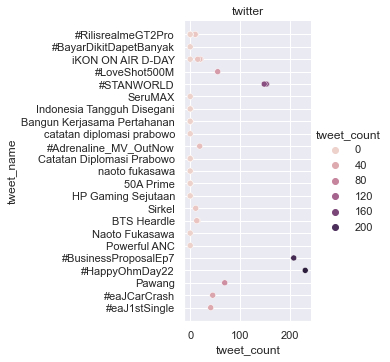

In [32]:
import seaborn as sns
sns.set(style="darkgrid") 
sns.relplot(x="tweet_count", y="tweet_name", hue="tweet_count", data=df.head(50)).set(
    title="twitter")